In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [3]:
from Environment import Environment
from Agents import DQNAgent
from Engine import Engine

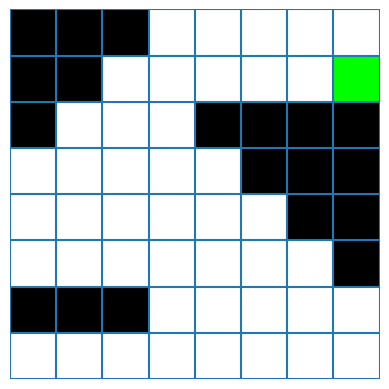

In [5]:
size = (8,8)
goal_reward  = 50
fail_penalty = -10
time_penalty = -1
outOfBoundsList = [(x,1) for x in range(3)]
for i in range(4):
    outOfBoundsList += [(x,5-i) for x in range(4+i,8)]
for i in range(3):
    outOfBoundsList += [(x,7-i) for x in range(3-i)]
goalList = [(7,6)]

state_dim = 4
action_dim = 9

gamma = .9

env = Environment(size,goal_reward,fail_penalty,time_penalty,outOfBoundsList,goalList)
agent = DQNAgent(state_dim,action_dim, gamma = gamma)
engine = Engine(env,agent)

env.display()

In [6]:
engine.train_dynamic(400000,fileName = "train_metrics.csv")

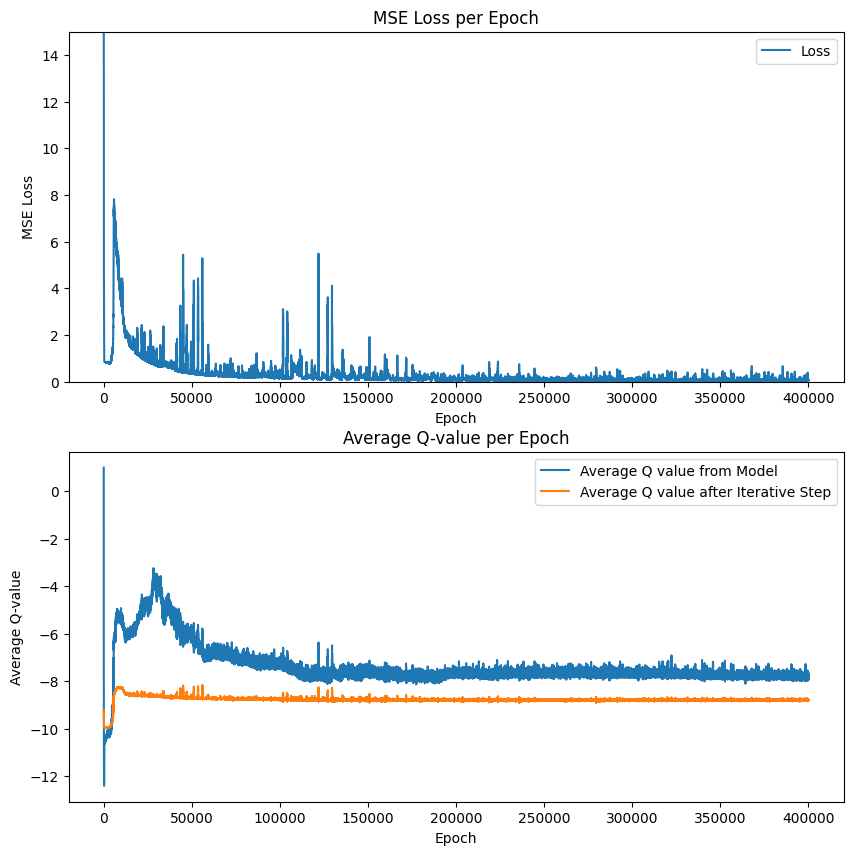

In [7]:
df = pd.read_csv("train_metrics.csv").set_index("Epoch")
fig,ax = plt.subplots(2,1,figsize=(10,10))
df[["Loss"]].plot(ax=ax[0])
ax[0].set_ylim(0,15)
ax[0].set_title("MSE Loss per Epoch")
ax[0].set_ylabel("MSE Loss")
df.drop(columns=["Loss"]).rename(columns={"Q_model":"Average Q value from Model","Q_update":"Average Q value after Iterative Step"}).plot(ax=ax[1])
ax[1].set_title("Average Q-value per Epoch")
ax[1].set_ylabel("Average Q-value");

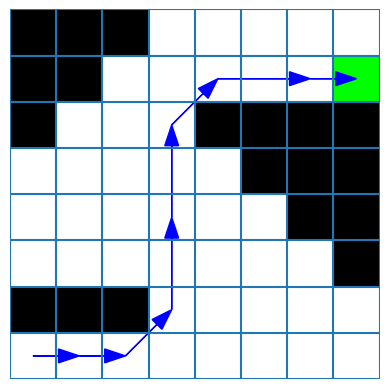

In [8]:
engine.display_run((0,0,0,0),epsilon=0)

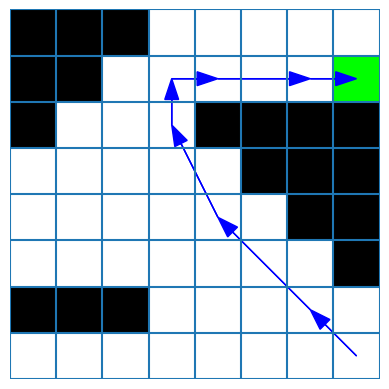

In [9]:
engine.display_run((7,0,0,0),epsilon=0)

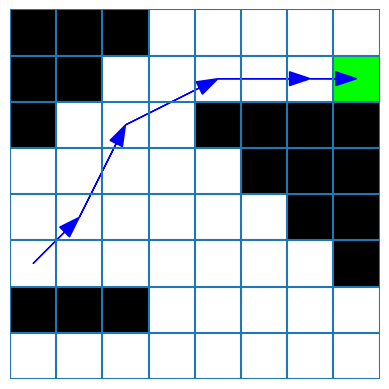

In [10]:
engine.display_run((0,2,0,0),epsilon=0)

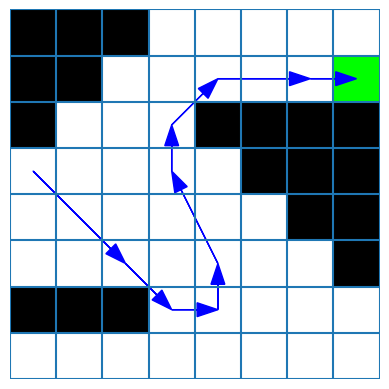

In [11]:
engine.display_run((0,4,3,-3),epsilon=0)